In [7]:
import pandas as pd


In [8]:
import logging
# Step 1: Create a logger object
logger = logging.getLogger('my_logger')

# Step 2: Set the logging level
logger.setLevel(logging.DEBUG)

In [9]:
def parse(file_name="input/random-n2048-d16-c16.txt"):
  
  lns = []
  with open(file_name) as fl:
    n = 0
    for ln in fl:
      n += 1
      if n==1: continue
      lns.append([float(i) for i in ln.split()[1:]])
  return lns


In [10]:
pts = parse()


In [11]:
logger.info(len(pts))
logger.info( "First point = {}".format(pts[0]) )

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [13]:
def readLabels(input_file="output/2048.txt"):
  labels = []
  with open(input_file) as fl:
    for ln in fl:
      labels.append(int(ln))
  return labels

def readCentroids(input_file="output/2048.centroids.txt"):
  pts = []
  with open(input_file) as fl:
    for ln in fl:
      pts.append([float(i) for i in ln.split()])
  return pts 

In [14]:
init_cent = np.array(readCentroids("initial.txt"))

# Create KMeans instance
#kmeans = KMeans(n_clusters=16, init='random', random_state=1)
kmeans = KMeans(n_clusters=16, init=init_cent)

X = np.array(pts)
# Sample data


# Fit the model
kmeans.fit(X)

# Predict the clusters
labels = kmeans.predict(X)

# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Print results
#print("Cluster labels:", labels)
#print("Centroids:", centroids)



/home/dinesh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/dinesh/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


<ipython-input-15-8b7d7f1d8452>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c="red", s=10, cmap='viridis')


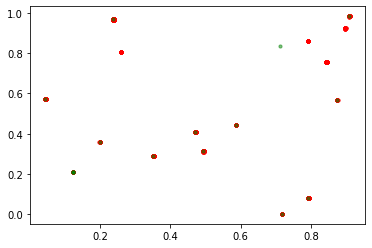

In [15]:
# Plot the data and centroids
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], c="red", s=10, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=10, alpha=0.5)
plt.show()

In [18]:
import subprocess
import os

if not os.path.exists("output"): os.mkdir("output")

subprocess.run("./kmeans -k 16 -d 16 -i input/random-n2048-d16-c16.txt -c > output/2048.centroids.txt")

FileNotFoundError: [Errno 2] No such file or directory: './kmeans -k 16 -d 16 -i input/random-n2048-d16-c16.txt -c > output/2048.centroids.txt'

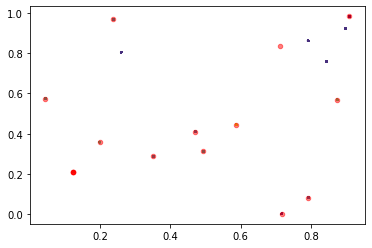

In [16]:
lbls = readLabels()
cnts = np.array(readCentroids())

# Plot the data and centroids
plt.scatter(X[:, 0], X[:, 1], c=lbls, s=1, cmap='viridis')
plt.scatter(cnts[:, 0], cnts[:, 1], c='red', s=20, alpha=0.5)
plt.show()

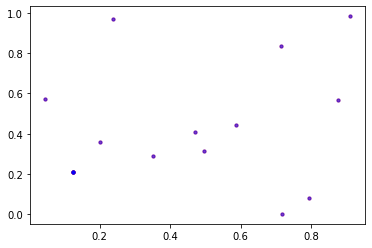

In [17]:
# Plot the data and centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=10, alpha=0.5)
plt.scatter(cnts[:, 0], cnts[:, 1], c='blue', s=10, alpha=0.5)
plt.show()

We can observe that the final centroids by our C++ code matches with the ones generated by the Pythons, Kmeans.